In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import load_model


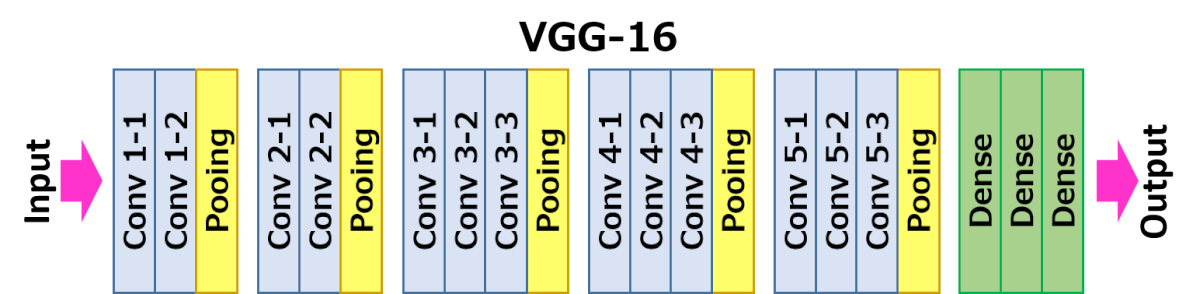

^^^
VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s. source: https://neurohive.io/en/popular-networks/vgg16/


In [ ]:
# Training data augmentation, preprocessing

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/SeeFood/hotdog-nothotdog/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/SeeFood/hotdog-nothotdog/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.
Found 644 images belonging to 2 classes.


In [ ]:
# Transfer Learning
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(1, activation='sigmoid')
])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 15,241,025
Trainable params: 526,337
Non-trainable params: 14,714,688
_________________________________________________________________


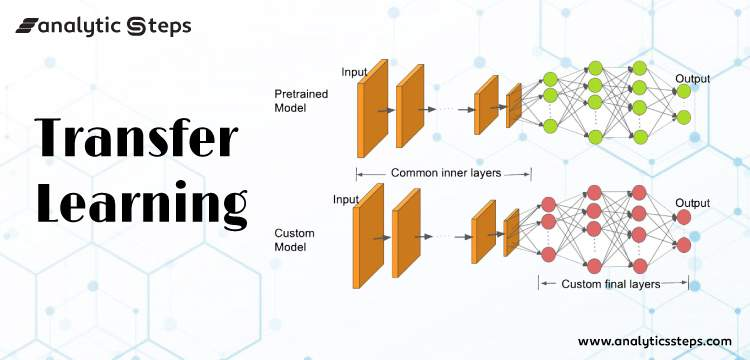

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    steps_per_epoch=train_data.samples//train_data.batch_size,
    validation_steps=val_data.samples//val_data.batch_size
)

Epoch 1/10
93/93 [==============================] - 561s 6s/step - loss: 0.6820 - accuracy: 0.8649 - val_loss: 0.2682 - val_accuracy: 0.9344
Epoch 2/10
93/93 [==============================] - 130s 1s/step - loss: 0.2566 - accuracy: 0.9104 - val_loss: 0.2673 - val_accuracy: 0.9234
Epoch 3/10
93/93 [==============================] - 131s 1s/step - loss: 0.2396 - accuracy: 0.9144 - val_loss: 0.2014 - val_accuracy: 0.9359
Epoch 4/10
93/93 [==============================] - 130s 1s/step - loss: 0.1602 - accuracy: 0.9353 - val_loss: 0.2353 - val_accuracy: 0.9219
Epoch 5/10
93/93 [==============================] - 131s 1s/step - loss: 0.1393 - accuracy: 0.9444 - val_loss: 0.2196 - val_accuracy: 0.9266
Epoch 6/10
93/93 [==============================] - 131s 1s/step - loss: 0.1249 - accuracy: 0.9501 - val_loss: 0.2047 - val_accuracy: 0.9297
Epoch 7/10
93/93 [==============================] - 131s 1s/step - loss: 0.1091 - accuracy: 0.9582 - val_loss: 0.2554 - val_accuracy: 0.9266
Epoch 8/10
93

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# If stored in Google Drive
#drive.mount('/content/drive')
model = load_model('/content/drive/MyDrive/SeeFood/final_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 272ms/step


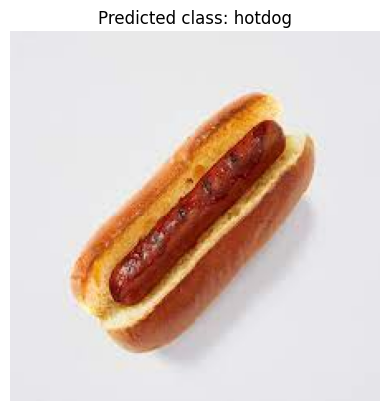

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Function to prepare the image
def prepare_image(file_path):
    img = load_img(file_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)
    return img_array, img

# Path to your new image
image_path = '/content/drive/MyDrive/SeeFood/preditctions/hotdog2.jpg'

# Prepare the image
prepared_img, original_img = prepare_image(image_path)

# Predict
prediction = model.predict(prepared_img)

# Interpret the output
# Since it's a binary classification, you can use 0.5 as a threshold
predicted_class = 'hotdog' if prediction[0][0] < 0.5 else 'nothotdog'

# Display the image
plt.imshow(original_img)
plt.axis('off') # Hide the axes
plt.title(f"Predicted class: {predicted_class}")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')b

Mounted at /content/drive


1/1 [==============================] - 0s 90ms/step


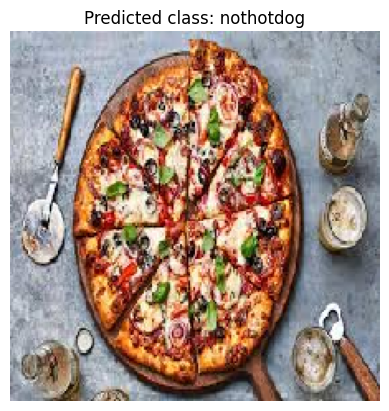

In [ ]:


# Function to prepare the image
def prepare_image(file_path):
    img = load_img(file_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)
    return img_array, img

# Path to your new image
image_path = '/content/drive/MyDrive/SeeFood/preditctions/pizza.jpg'

# Prepare the image
prepared_img, original_img = prepare_image(image_path)

# Predict
prediction = model.predict(prepared_img)

# Interpret the output
# Since it's a binary classification, you can use 0.5 as a threshold
predicted_class = 'hotdog' if prediction[0][0] > 0.5 else 'nothotdog'

# Display the image
plt.imshow(original_img)
plt.axis('off') # Hide the axes
plt.title(f"Predicted class: {predicted_class}")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')